In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
insurance_df = pd.read_csv('insurance.csv')

In [110]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [111]:
insurance_df.shape

(1338, 7)

In [112]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataframe has no null values

In [113]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Extracting categorical variables

In [114]:
categorical = []
numerical = []
for col in insurance_df.columns:
    if insurance_df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [115]:
categorical

['sex', 'smoker', 'region']

In [116]:
numerical.remove('charges')

In [117]:
numerical

['age', 'bmi', 'children']

In [118]:
for cat in categorical:
    print(cat)
    print('----')
    print(insurance_df[cat].value_counts())
    print()

sex
----
male      676
female    662
Name: sex, dtype: int64

smoker
----
no     1064
yes     274
Name: smoker, dtype: int64

region
----
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



The categorical variables have few categories making it possible to encode all the categories without losing information

In [119]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


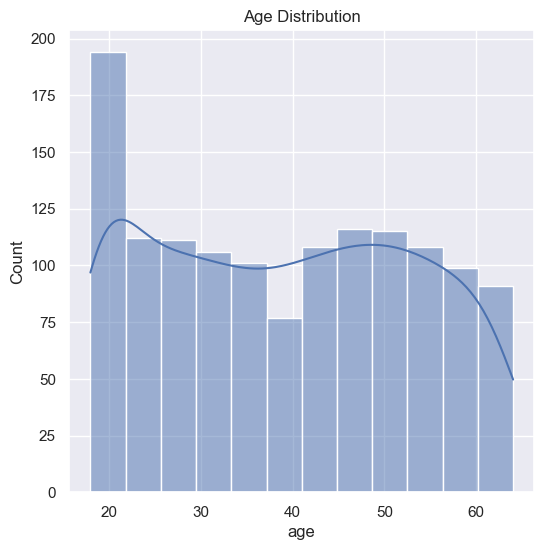

In [120]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

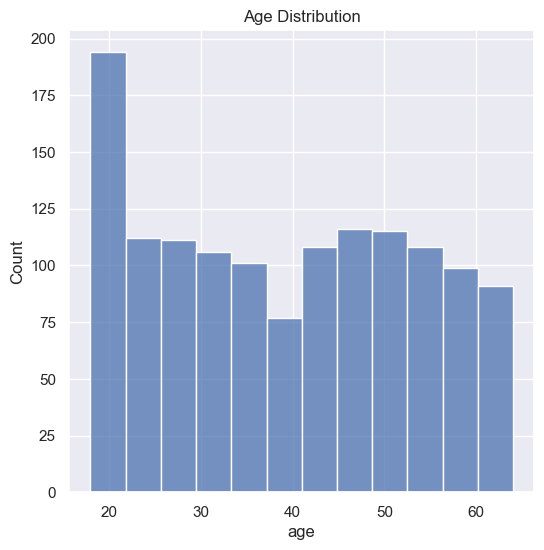

In [121]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'BMI Distribution')

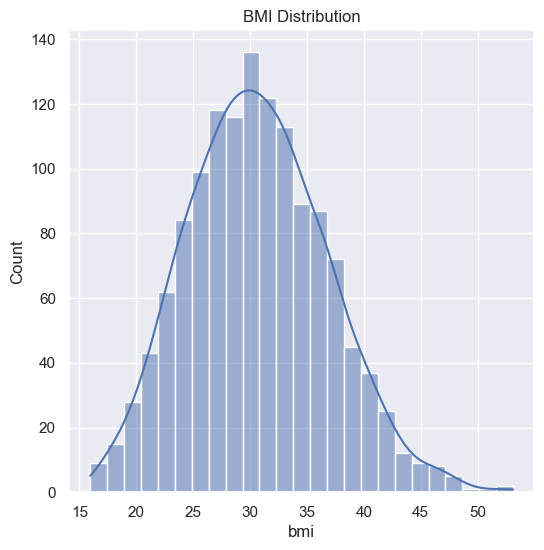

In [122]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['bmi'],kde=True)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Number of Children')

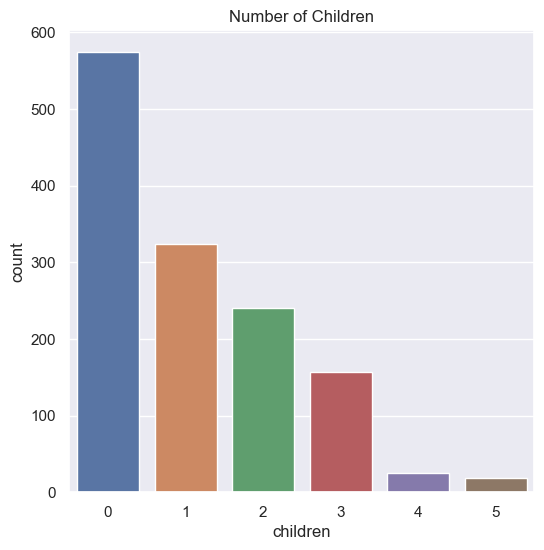

In [123]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_df)
plt.title('Number of Children')

In [124]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker')

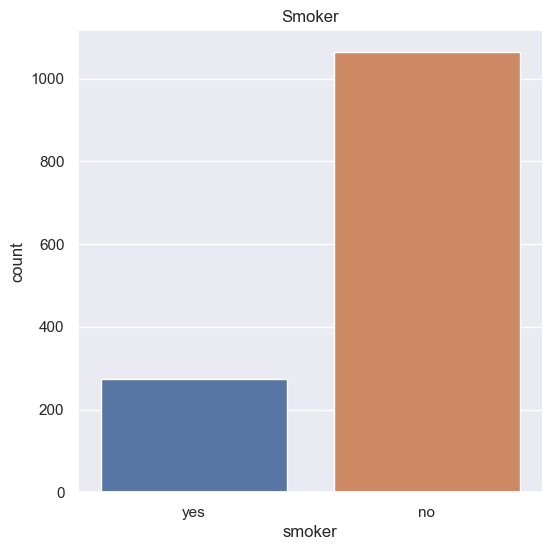

In [125]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_df)
plt.title('Smoker')

In [126]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Regions')

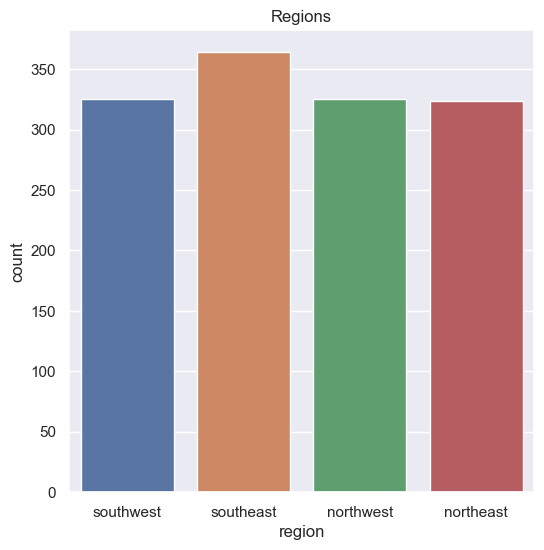

In [127]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_df)
plt.title('Regions')

In [128]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Charge Distribution')

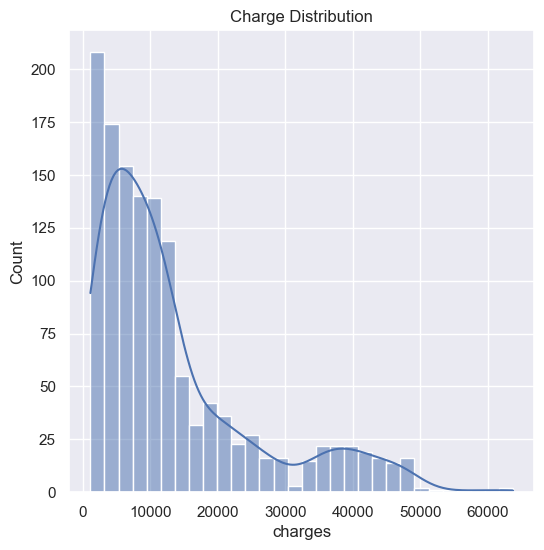

In [129]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['charges'],kde=True)
plt.title('Charge Distribution')

Data Preprocessing

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x = insurance_df.drop(columns=['charges'])

In [132]:
y = insurance_df['charges']

In [133]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [134]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [136]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [137]:
num_pipeline = Pipeline(
    steps=[('scaler',StandardScaler(with_mean=False))]
)

In [138]:
cat_pipeline = Pipeline(
        steps=[('ohe',OneHotEncoder()),
              ('scaler',StandardScaler(with_mean=False))]
)

In [139]:
preprocessor = ColumnTransformer(
    [('num_pipeline',num_pipeline,numerical),
    ('cat_pipeline',cat_pipeline,categorical)]
)

In [140]:
x_train_df = pd.DataFrame(preprocessor.fit_transform(x_train))

In [141]:
x_test_df = pd.DataFrame(preprocessor.transform(x_test))

In [142]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [143]:
from sklearn.metrics import r2_score

In [146]:
models = {"LinearRegression":LinearRegression(),
         "Ridge":Ridge(),
         "Lasso":Lasso(),
         "KNeighborsRegressor":KNeighborsRegressor(),
         "DecisionTreeRegressor":DecisionTreeRegressor(),
         "RandomForestRegressor":RandomForestRegressor(),
         "XGBRegressor":XGBRegressor()}

In [147]:
output = {}
for model_name,model in models.items():
    model.fit(x_train_df,y_train)
    y_test_pred = model.predict(x_test_df)
    output[model_name] = r2_score(y_test,y_test_pred)

In [148]:
output

{'LinearRegression': 0.7536286334169217,
 'Ridge': 0.7536297735948404,
 'Lasso': 0.7536533709247075,
 'KNeighborsRegressor': 0.8003182045924979,
 'DecisionTreeRegressor': 0.6782811039232839,
 'RandomForestRegressor': 0.838600552545204,
 'XGBRegressor': 0.8063649067466048}

In [150]:
best_model,best_model_score = sorted(output.items(),key=lambda x:x[1])[-1]

In [151]:
print(f"{best_model} : {best_model_score}")

RandomForestRegressor : 0.838600552545204
